In [ ]:
import os
HOME = os.getcwd()
print(HOME)

/content


In [ ]:
!git clone https://github.com/SkalskiP/yolov9.git
%cd yolov9
!pip install -r requirements.txt -q

Cloning into 'yolov9'...
remote: Enumerating objects: 325, done.
remote: Counting objects: 100% (218/218), done.
remote: Compressing objects: 100% (62/62), done.
remote: Total 325 (delta 159), reused 156 (delta 156), pack-reused 107
Receiving objects: 100% (325/325), 2.23 MiB | 26.00 MiB/s, done.
Resolving deltas: 100% (165/165), done.
/content/yolov9
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.3/207.3 kB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.7/62.7 kB 5.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 73.5 MB/s eta 0:00:00


In [ ]:
!pip install -q roboflow

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 75.5/75.5 kB 2.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 158.3/158.3 kB 7.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 178.7/178.7 kB 10.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 58.8/58.8 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.1/49.1 MB 9.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.5/54.5 kB 7.1 MB/s eta 0:00:00


In [ ]:
import roboflow

from IPython.display import Image

In [ ]:
!mkdir -p {HOME}/weights

In [ ]:
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/yolov9-e.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt
!wget -P {HOME}/weights -q https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-e.pt

In [ ]:
!ls -la {HOME}/weights

total 402444
drwxr-xr-x 2 root root      4096 May 31 07:11 .
drwxr-xr-x 1 root root      4096 May 31 07:11 ..
-rw-r--r-- 1 root root  51508261 Feb 18 12:36 gelan-c.pt
-rw-r--r-- 1 root root 117203713 Feb 18 12:36 gelan-e.pt
-rw-r--r-- 1 root root 103153312 Feb 18 12:36 yolov9-c.pt
-rw-r--r-- 1 root root 140217688 Feb 18 12:36 yolov9-e.pt


In [ ]:
!pip install roboflow

from roboflow import Roboflow

project = rf.workspace("cards-srwni").project("sign-language-of-alphabets")
version = project.version(3)
dataset = version.download("yolov9")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to Sign-Language-of-Alphabets-3 in yolov9:: 100%|██████████| 18340/18340 [00:03<00:00, 5551.58it/s]


In [ ]:
!pip install requests
import requests

# URL to the model file
url = 'https://github.com/WongKinYiu/yolov9/releases/download/v0.1/gelan-c.pt'

# Path where you want to save the file
save_path = '/content/weights/gelan-c.pt'

# Download the file
response = requests.get(url)
if response.status_code == 200:
    with open(save_path, 'wb') as f:
        f.write(response.content)
    print(f"Model downloaded and saved to {save_path}")
else:
    print(f"Failed to download file. Status code: {response.status_code}")


Model downloaded and saved to /content/weights/gelan-c.pt


In [ ]:
%cd {HOME}/yolov9

!python train.py \
--batch 8 --epochs 11 --img 640 --device 0 --min-items 0 \
--data {dataset.location}/data.yaml \
--weights {HOME}/weights/gelan-c.pt \
--cfg models/detect/gelan-c.yaml \
--hyp hyp.scratch-high.yaml

/content/yolov9
2024-05-31 07:14:33.590302: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-05-31 07:14:33.590362: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-05-31 07:14:33.591724: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-05-31 07:14:33.599553: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 AVX512F FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-31 07:14:34.864547: W

In [ ]:
!ls /content/yolov9/runs/train/exp

events.out.tfevents.1717139676.43ef7853cc69.2383.0  labels.jpg	 train_batch0.jpg  weights
hyp.yaml					    opt.yaml	 train_batch1.jpg
labels_correlogram.jpg				    results.csv  train_batch2.jpg


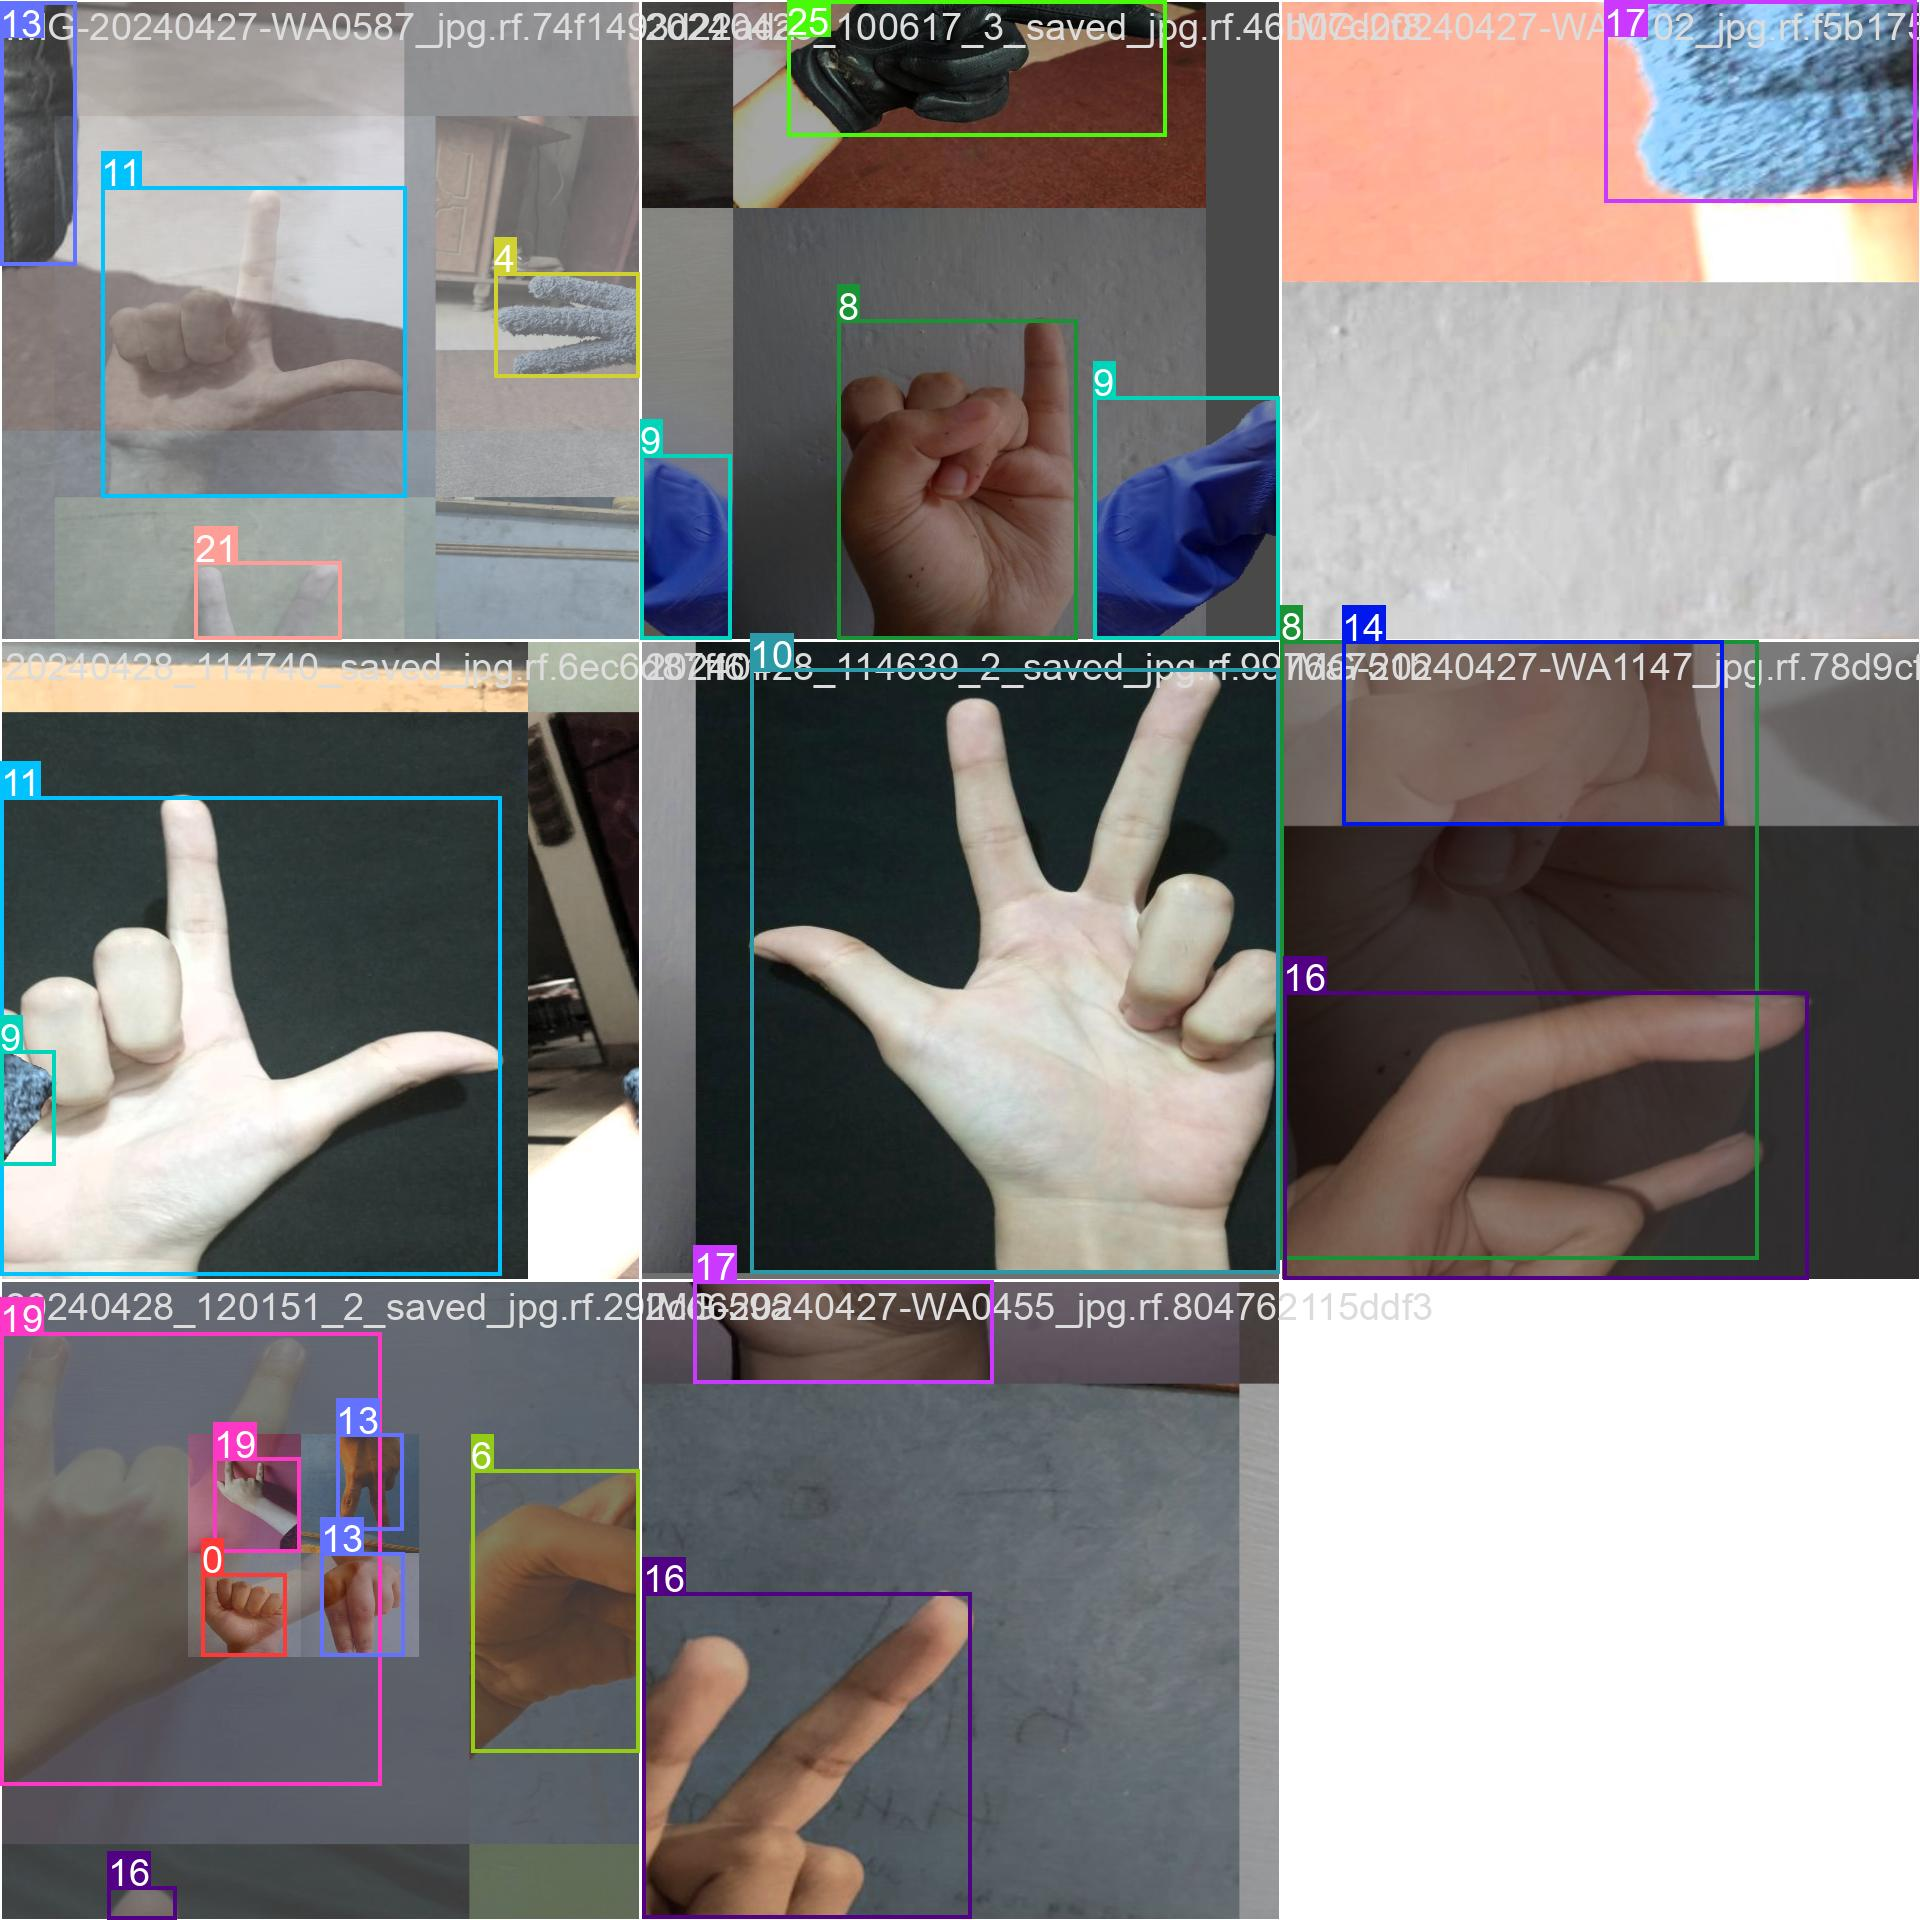

In [ ]:
Image(filename=f"/content/yolov9/runs/train/exp/train_batch2.jpg")

In [ ]:
%cd {HOME}/yolov9

!python val.py \
--img 640 --batch 8 --conf 0.001 --iou 0.7 --device 0 \
--data {dataset.location}/data.yaml \
--weights /content/yolov9/runs/train/exp/weights/best.pt

/content/yolov9
val: data=/content/yolov9/Sign-Language-of-Alphabets-3/data.yaml, weights=['/content/yolov9/runs/train/exp/weights/best.pt'], batch_size=8, imgsz=640, conf_thres=0.001, iou_thres=0.7, max_det=300, task=val, device=0, workers=8, single_cls=False, augment=False, verbose=False, save_txt=False, save_hybrid=False, save_conf=False, save_json=False, project=runs/val, name=exp, exist_ok=False, half=False, dnn=False, min_items=0
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25431006 parameters, 0 gradients, 102.6 GFLOPs
val: Scanning /content/yolov9/Sign-Language-of-Alphabets-3/valid/labels.cache... 753 images, 1 backgrounds, 0 corrupt: 100% 753/753 [00:00<?, ?it/s]
                 Class     Images  Instances          P          R      mAP50   mAP50-95: 100% 95/95 [00:31<00:00,  3.02it/s]
                   all        753        757      0.956      0.968       0.98      0.947
                     A 

In [ ]:
!python detect.py \
--img 640 --conf 0.1 --device 0 \
--weights /content/yolov9/runs/train/exp/weights/best.pt \
--source {dataset.location}/valid/images

detect: weights=['/content/yolov9/runs/train/exp/weights/best.pt'], source=/content/yolov9/Sign-Language-of-Alphabets-3/valid/images, data=data/coco128.yaml, imgsz=[640, 640], conf_thres=0.1, iou_thres=0.45, max_det=1000, device=0, view_img=False, save_txt=False, save_conf=False, save_crop=False, nosave=False, classes=None, agnostic_nms=False, augment=False, visualize=False, update=False, project=runs/detect, name=exp, exist_ok=False, line_thickness=3, hide_labels=False, hide_conf=False, half=False, dnn=False, vid_stride=1
YOLOv5 🚀 1e33dbb Python-3.10.12 torch-2.3.0+cu121 CUDA:0 (Tesla T4, 15102MiB)

Fusing layers... 
gelan-c summary: 467 layers, 25431006 parameters, 0 gradients, 102.6 GFLOPs
image 1/753 /content/yolov9/Sign-Language-of-Alphabets-3/valid/images/20240407_105909_jpg.rf.bf09eff07f8776a1aeffe97bf9b70083.jpg: 640x640 1 K, 1 L, 51.8ms
image 2/753 /content/yolov9/Sign-Language-of-Alphabets-3/valid/images/20240407_105924_jpg.rf.84ebd07d55930db5030710cfdfeec8b3.jpg: 640x640 1 M

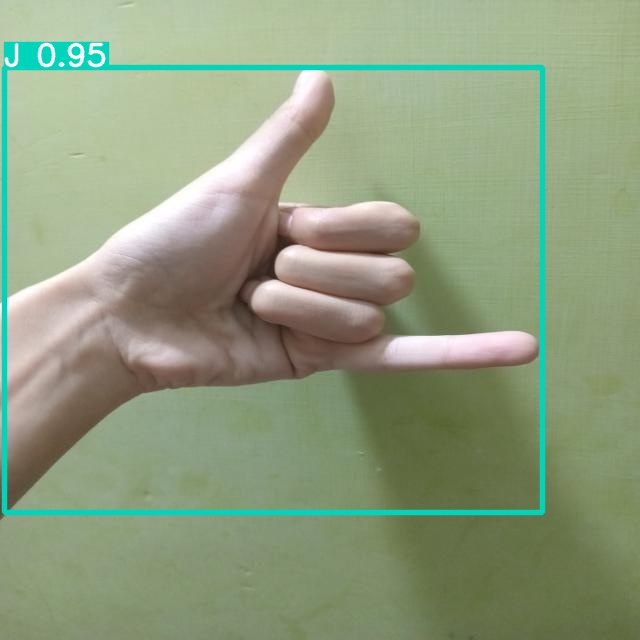

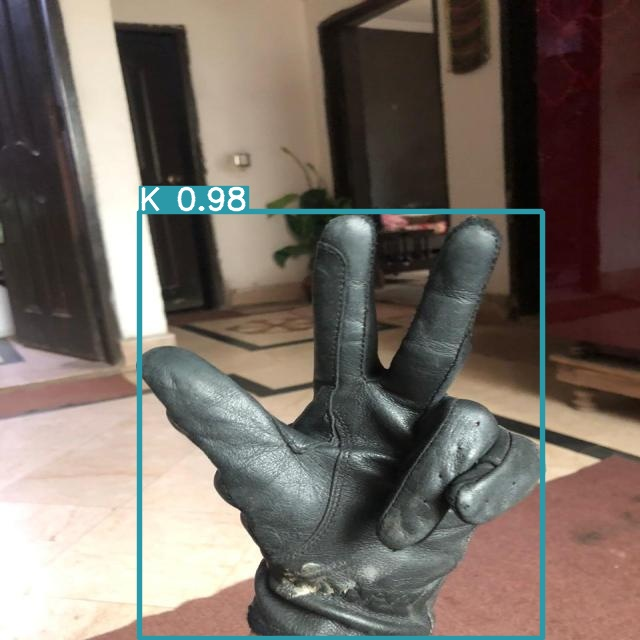

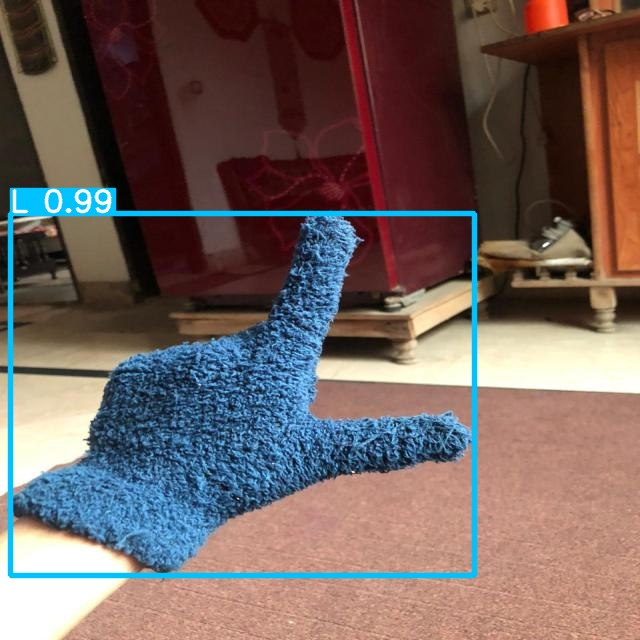

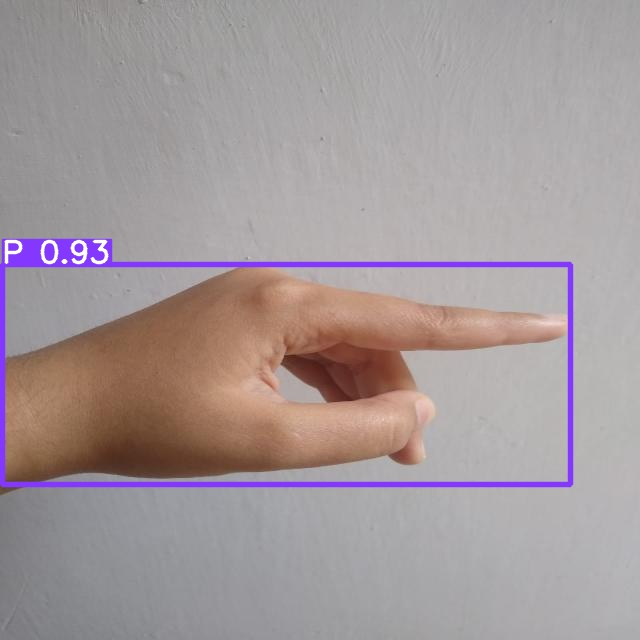

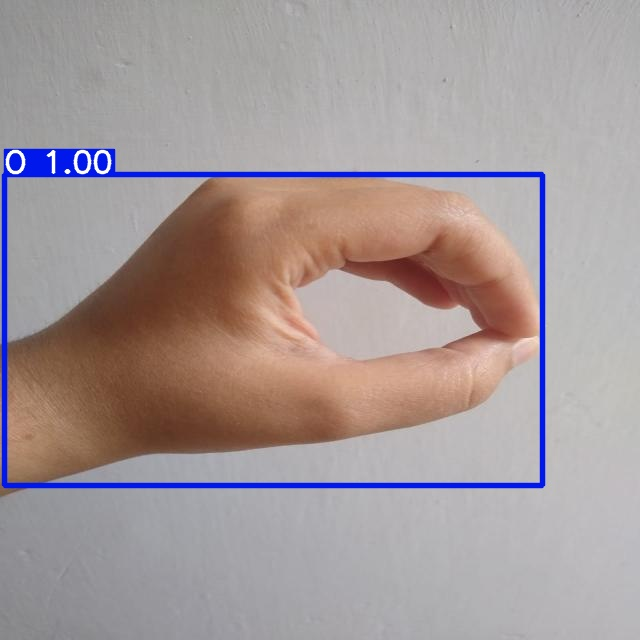

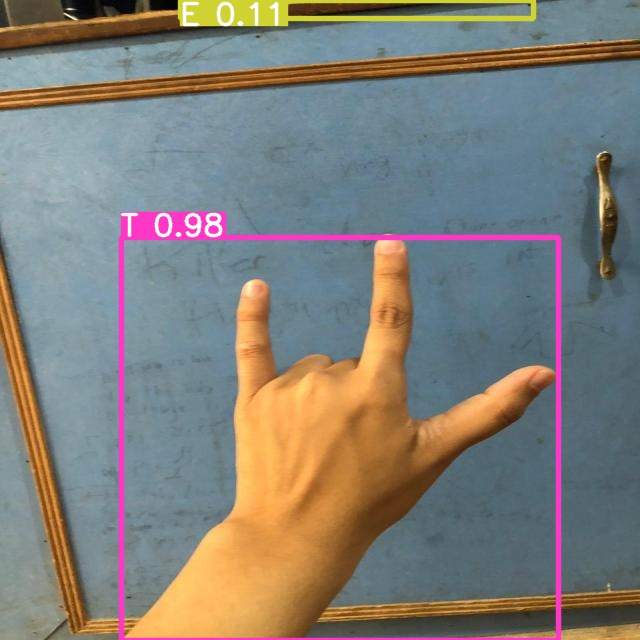

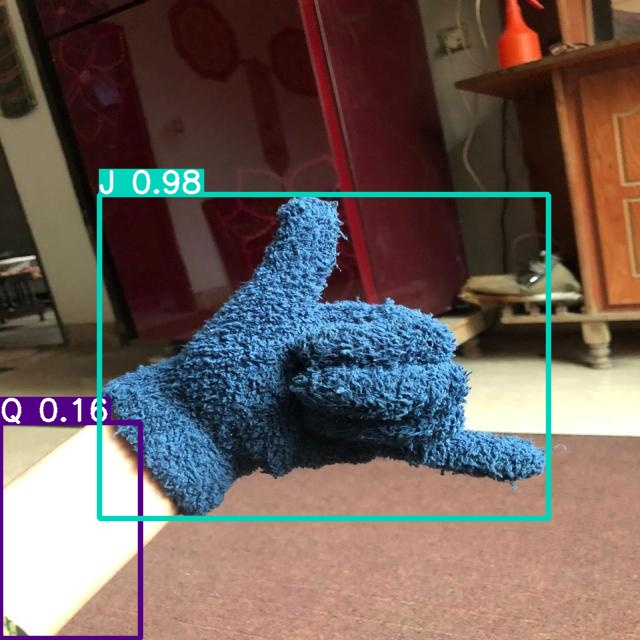

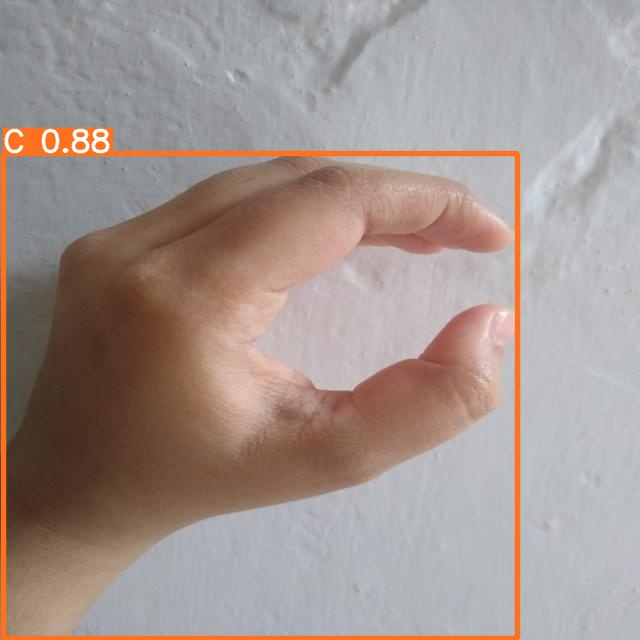

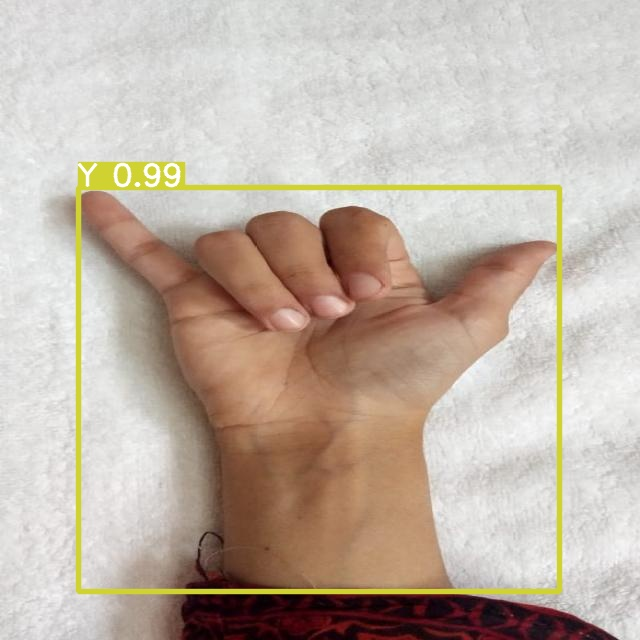

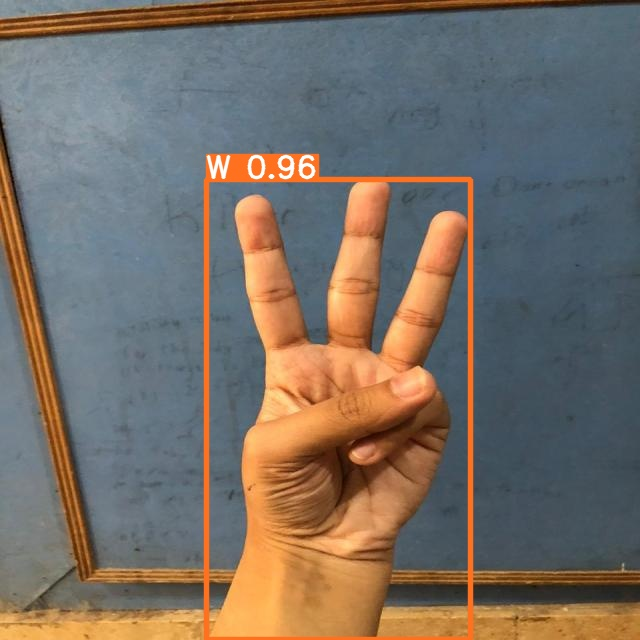

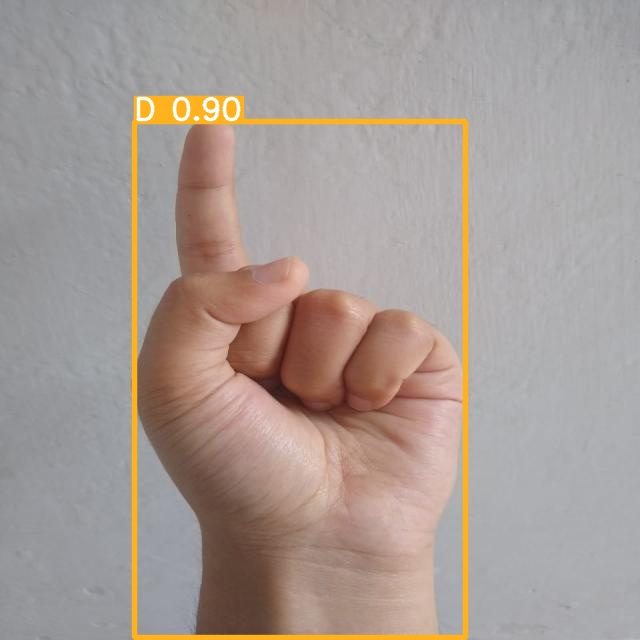

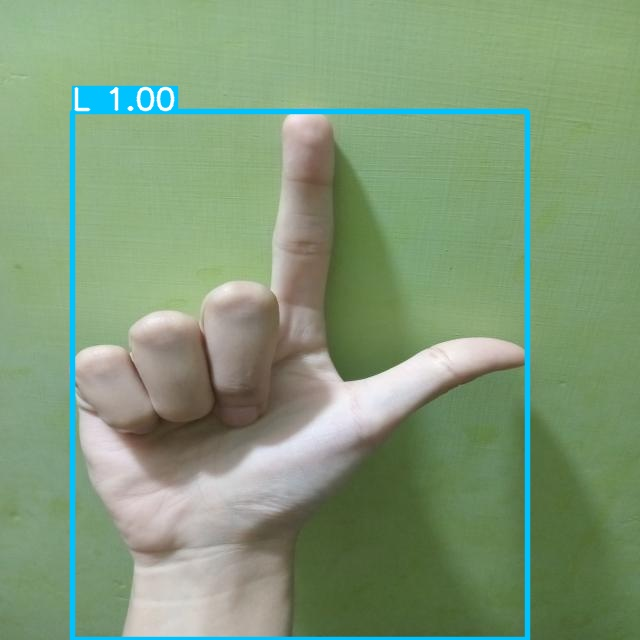

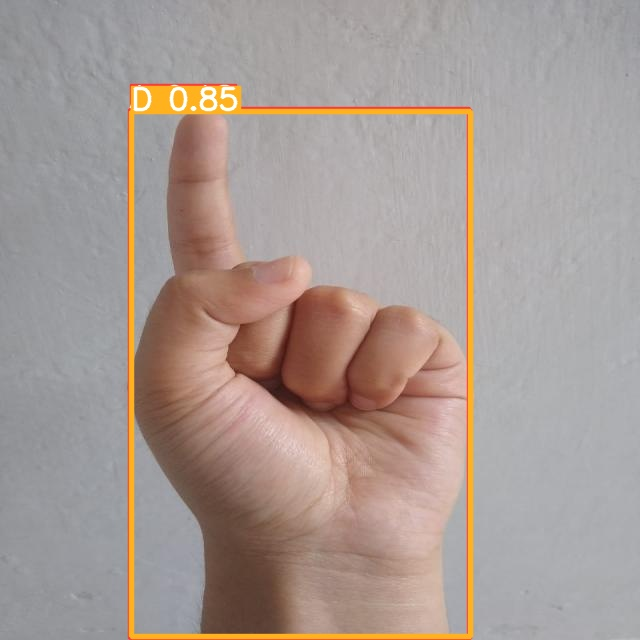

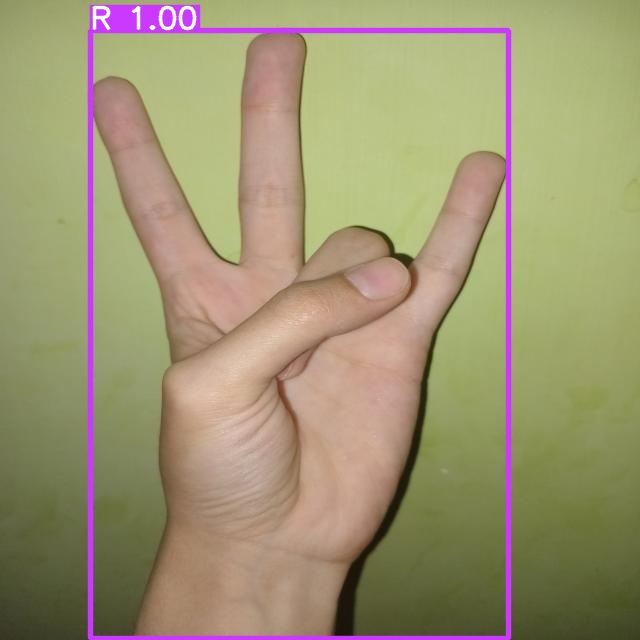

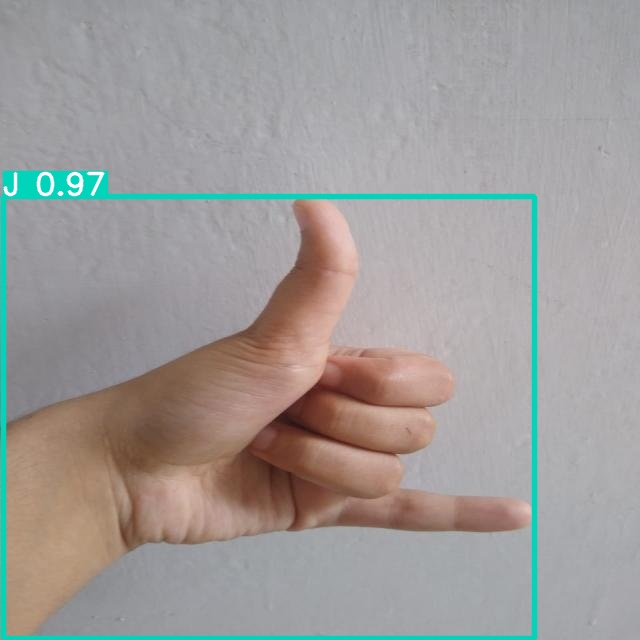

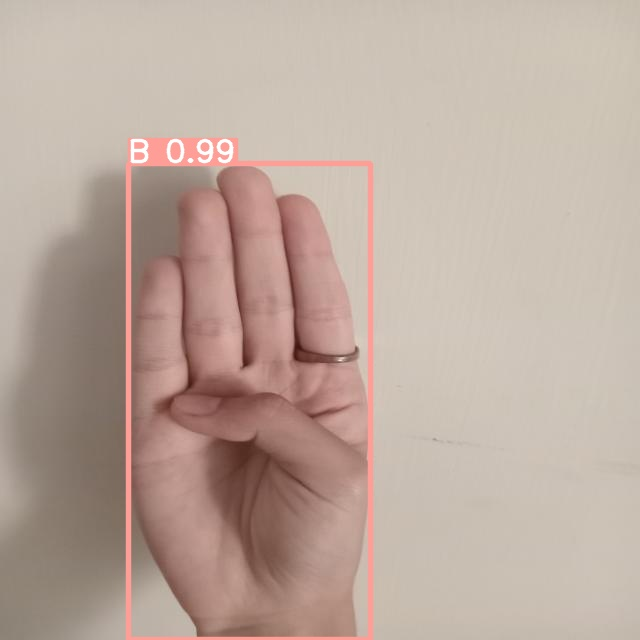

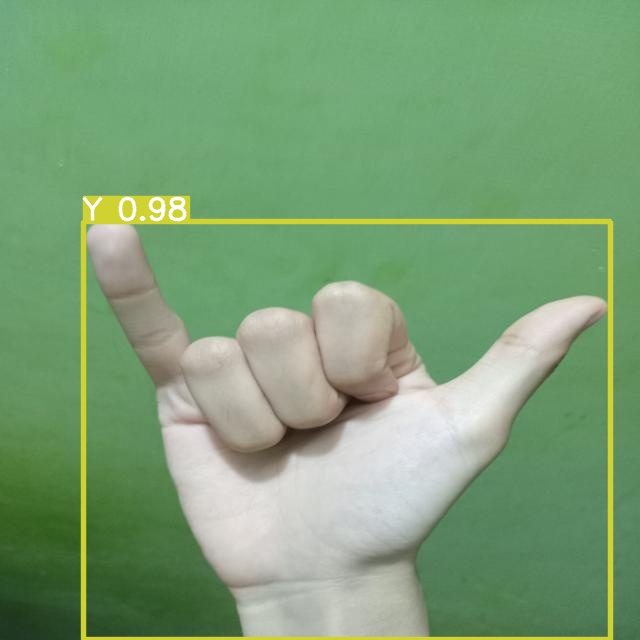

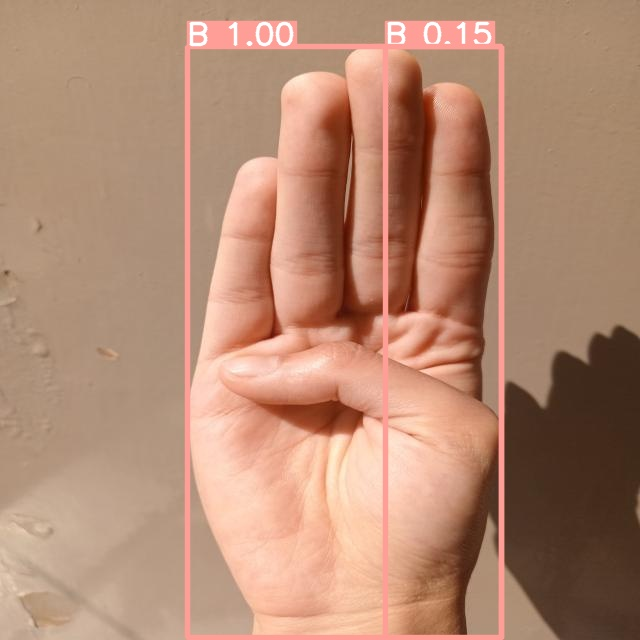

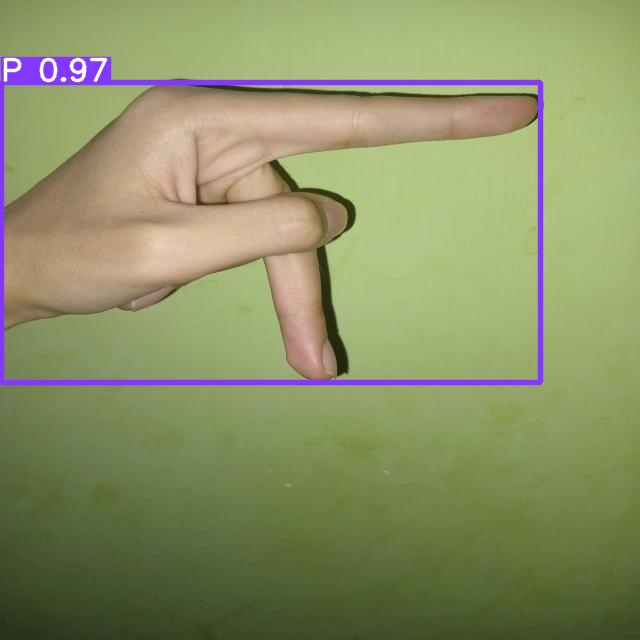

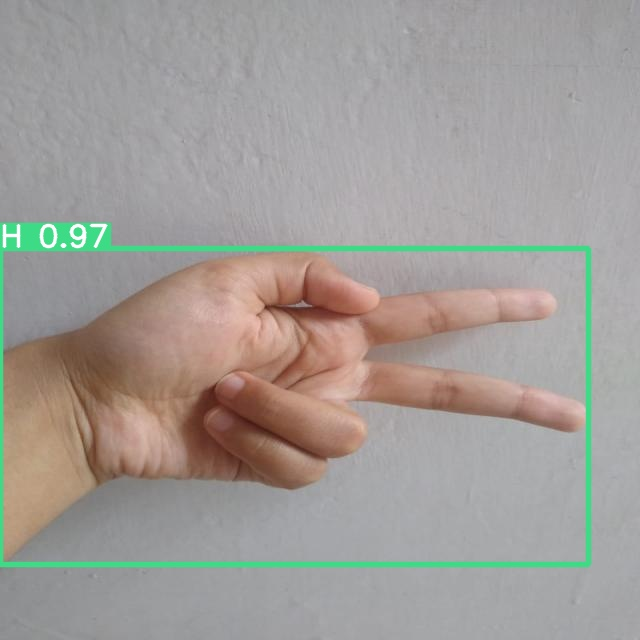

In [ ]:
import glob
from IPython.display import Image, display

for image_path in glob.glob(f'/content/yolov9/runs/detect/exp/*')[:20]:
      display(Image(filename=image_path, width=600))